In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


pandas info(): 데이터프레임의 각 열의 데이터 타입과 누락된 데이터가 있는지 확인

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


pandas describe(): 열(feature)에 대한 간략한 통계를 출력 (최소, 최대, 평균 값 등)

In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape) # 5197개의 sample 3개의 Feature

(5197, 3) (1300, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [ ]:
# z = 0.51270274 * alcohol + 1.6733911 * sugar - 0.68767781 * pH + 1.81777902 (로지스틱 회귀 방정식)
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


# 결정 트리(DecisionTreeClassifier)
결정 트리는 노드로 이루어져 있다. 노드는 훈련데이터의 특성에 대한 테스트를 표현한다.<br>
criterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것<br>
criterion 매개변수의 기본값 = 'gini'<br>
ex)<br>
현재 샘플의 당도가 -0.239보다 작거나 같은지?<br>
가지는 테스트의 결과(True, False)를 나타냄

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


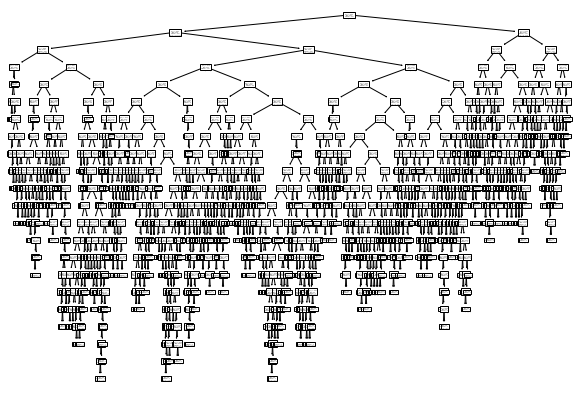

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

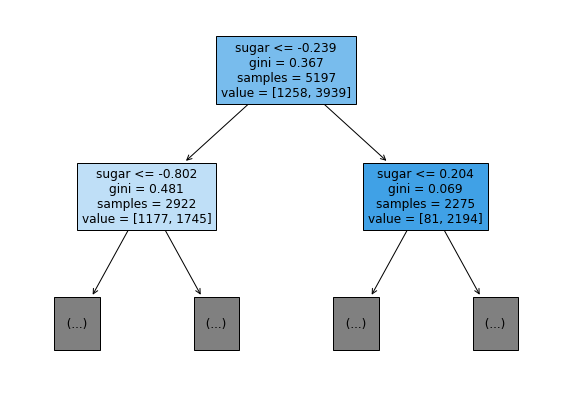

In [ ]:
plt.figure(figsize=(10, 7))
# filled는 노드에 색을 채움 어떤 클래스의 비율이 높아지면 진한 특정 색으로 표시, feature_names을 설정하지 않으면 X[0], X[1] 이런식으로 표기 됨
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

##불순도
위의 gini는 지니 불순도를 의미<br>
criterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것이다.<br>
결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킨다.<br>
$지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2) $<br>
불순도가 0인 노드는 순수노드라고 부른다.<br>
부모와 자식 노드 사이의 불순도 차이를 ***정보 이득*** 이라고 부른다.<br>
$부모의 불순도 - {왼쪽노드샘플수 \over 부모의샘플수} × 왼쪽노드불순도 - {오른쪽노드샘플수 \over 부모의샘플수} × 오른쪽노드불순도$


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


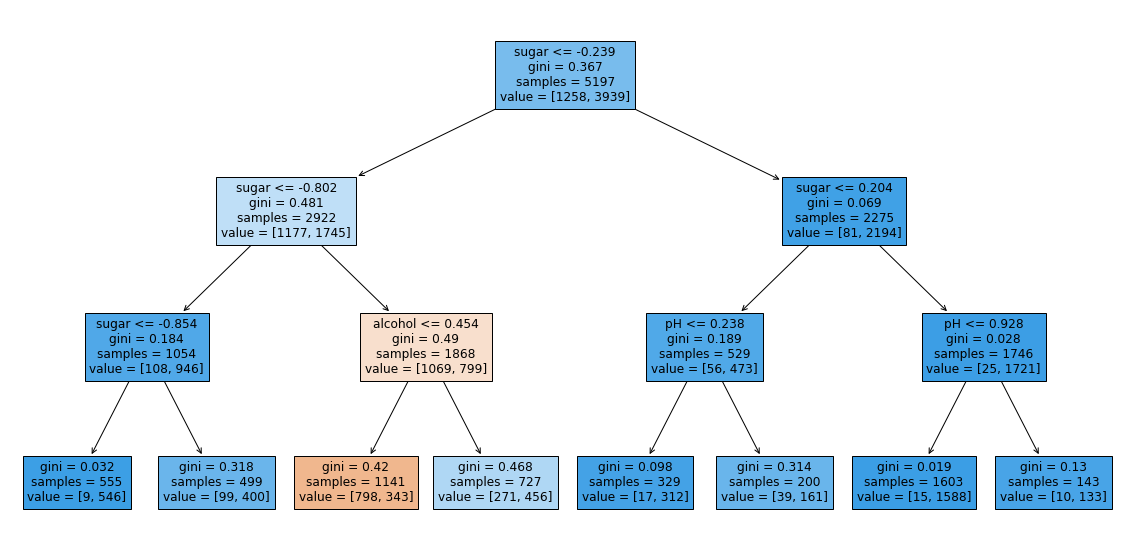

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

DecisionTreeClassifier에서는 각 특징끼리 비교하기 때문에 전처리가 필요 없음

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


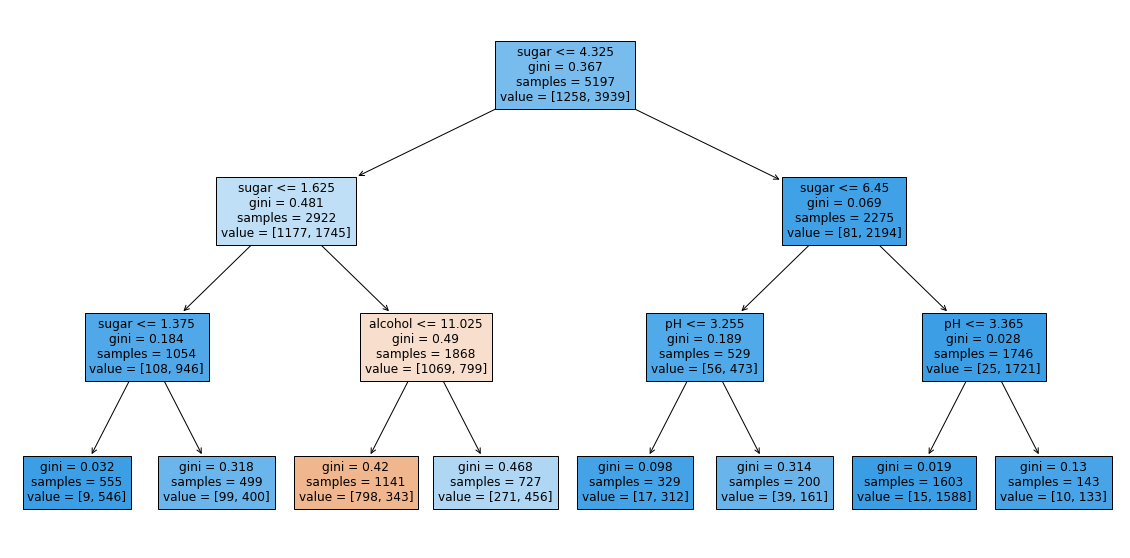

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
print(dt.feature_importances_)  # 각 특성의 중요도

[0.12345626 0.86862934 0.0079144 ]
